In [1]:
import pandas as pd

df = pd.read_hdf('/Volumes/crypto_data/price_data/binance/1m/SOLUSDT_PERPETUAL.h5')

In [2]:
def resample_df(df,freq = '1h'):
    cols = ['open', 'high', 'low', 'close','volume']
    agg =  ['first','max',  'min', 'last', 'sum']
    df = df[cols]
    df = df.resample(freq).agg(dict(zip(cols,agg)))
    return df.dropna()
df = resample_df(df, freq='15T')

In [19]:
import pandas_ta as ta

df.ta.stoch(high='high', low='low', close='close', k=38, d=40, append=True)
df.ta.stoch(high='high', low='low', close='close', k=80, d=116, append=True)

df['double_l_d'] = df[f'STOCHd_{38}_{40}_3'].ewm(span=40, adjust=False).mean()
df['double_s_d'] = df[f'STOCHd_{80}_{116}_3'].ewm(span=116, adjust=False).mean()
df['double_l_dd'] = df['double_l_d'].ewm(span=100, adjust=False).mean()
df['double_s_dd'] = df['double_s_d'].ewm(span=116, adjust=False).mean()
df

,open,high,low,close,volume,STOCHk_38_40_3,STOCHd_38_40_3,STOCHk_80_116_3,STOCHd_80_116_3,double_l_d,double_s_d,double_l_dd,double_s_dd
open_time,,,,,,,,,,,,,
2020-12-31 16:00:00,1.4533,1.4646,1.4465,1.4562,132482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 16:15:00,1.4562,1.5074,1.4561,1.5062,212673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 16:30:00,1.5051,1.5066,1.4805,1.4903,177733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 16:45:00,1.4905,1.4909,1.4691,1.4738,98007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 17:00:00,1.4743,1.5171,1.4722,1.5109,192744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-05 23:00:00,40.9490,41.3860,40.9450,41.2270,531958,57.538712,34.426324,34.125462,45.492791,33.719718,59.121988,45.939440,59.611115
2023-11-05 23:15:00,41.2270,41.5730,41.2210,41.4030,437204,72.921760,35.603258,43.587870,45.347935,33.811598,58.886534,45.699285,59.598729
2023-11-05 23:30:00,41.4090,41.4560,41.2520,41.2830,194432,79.726976,37.029260,47.655584,45.219372,33.968557,58.652907,45.466993,59.582561


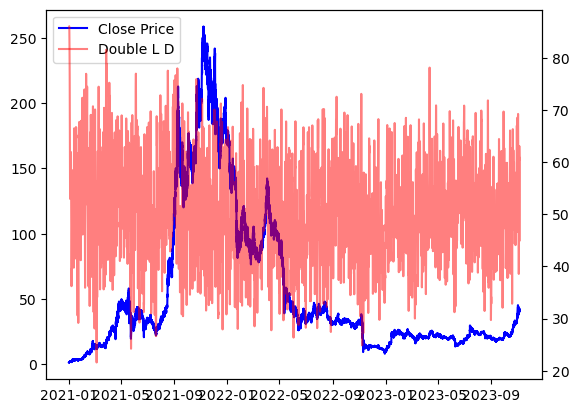

In [20]:
import matplotlib.pyplot as plt

# 创建一个图形对象
fig, ax1 = plt.subplots()

# 绘制第一个数据列
ax1.plot(df['close'], color='b', label='Close Price')

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制第二个数据列
ax2.plot(df['double_l_dd'], color='r', alpha=0.5,label='Double L D')

# 添加图例
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()
